## 堆的数据结构
堆（heap）在做题中的核心定位是：**用于高效维护“当前最值”或“前 K 个最值”**。在 Python 中通过 `heapq` 实现，默认是**小根堆**。

一、基础认知

1）本质
堆是一个完全二叉树结构，满足堆序性质：

* 小根堆：父节点 ≤ 子节点
* 堆顶永远是当前最小值

2）时间复杂度

* 将普通列表原地转换为堆 heapify：O(n)
* 插入 heappush：O(log n)
* 弹出最小值 heappop：O(log n)
* 访问堆顶：O(1)

二、Python 常用操作

```python
import heapq

# 建堆
heap = []
heapq.heappush(heap, x)

# 弹出最小值
min_val = heapq.heappop(heap)

# 查看最小值（不弹出）
top = heap[0]

# 批量建堆，将普通列表原地转换为堆（O(n)）
heapq.heapify(nums)
```
Python 没有内置“堆类型”。

heapq 只是提供：

一组函数，用来操作普通列表，使其满足堆性质

heap 本质还是 list，只是通过 heapq 的操作维持“堆序”。

三、如何构造大根堆

Python 只有小根堆。

常见做法：**取负数**

```python
heapq.heappush(heap, -x)
```

弹出时再取负号。

四、做题基本模式

1）维护前 K 大（或前 K 小）

思路：

* 用一个大小为 K 的小根堆
* 堆里存当前最大的 K 个数
* 堆顶是第 K 大

模板：

```python
heap = []
for x in nums:
    heapq.heappush(heap, x)
    if len(heap) > k:
        heapq.heappop(heap)
return heap[0]
```

时间复杂度：O(n log k)

适用于：

* Top K 问题
* 数据流第 K 大
* 实时维护前 K

2）每次取最小 / 最大

适用于：

* 合并 K 个有序链表
* 会议室调度
* Dijkstra 最短路径
* 优先队列问题

模式：

```python
while heap:
    val = heapq.heappop(heap)
```

五、堆适用场景判断

看到以下关键词可以考虑堆：

* 前 K 个
* 第 K 大 / 小
* 实时数据流
* 不断取最小 / 最大
* 合并多个有序结构
* 贪心每次选当前最优

六、和排序的区别

排序：O(n log n)
堆维护 K 个：O(n log k)

当 k ≪ n 时，堆明显更优。

七、核心一句话总结

堆的本质是：
**用 O(log n) 的代价，动态维护当前最值结构。**

做题时优先判断：

* 是一次性求解？（排序 / 快选）
* 还是动态维护？（堆）

---

## 215. 数组中的第K个最大元素

给定整数数组 nums 和整数 k，请返回数组中第 k 个最大的元素。

请注意，你需要找的是数组排序后的第 k 个最大的元素，而不是第 k 个不同的元素。

你必须设计并实现时间复杂度为 O(n) 的算法解决此问题。

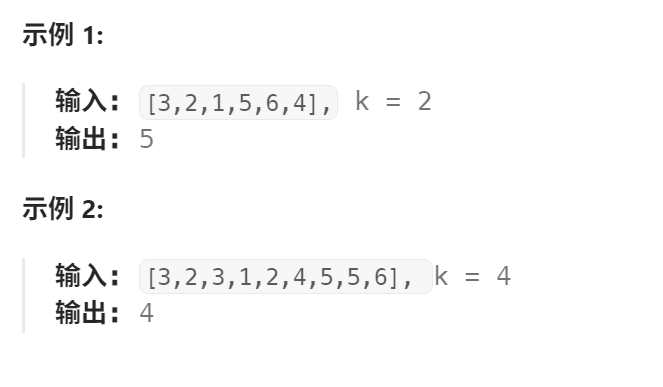

核心思路：

不需要完全排序，只需要确定第 k 大的位置。

满足 O(n) 时间复杂度的做法是 —— 快速选择（QuickSelect）。

---

排序的第 k 大 =
索引为 len(nums) - k 的元素（升序情况下）。

例如：

nums = [3,2,1,5,6,4]
k = 2

排序后：[1,2,3,4,5,6]
第 2 大 = 5
索引 = 6 - 2 = 4

所以问题转化为：

寻找下标为 target = n - k 的元素。

---

快速选择和快排类似，但：

只递归一边

不做完全排序

平均时间复杂度 O(n)。

In [13]:
from typing import List
import random

class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        """
        使用三路快选（Quick Select + 三路划分）

        核心目标：
        找到升序排列后，下标为 target 的元素
        """

        # ==============================
        # Step 1：将“第 k 大”转换为“升序第 target 小”
        # ==============================
        # 例：
        # nums = [1,2,3,4,5,6]
        # 第 2 大 = 5
        # 它的升序下标 = len(nums) - 2 = 6 - 2 = 4
        target = len(nums) - k


        # ==============================
        # 快速选择函数
        # 在 nums[left:right] 区间内
        # 找到下标为 target 的元素
        # ==============================
        def quick_select(left: int, right: int) -> int:

            # 递归终止条件
            # 区间只剩一个元素
            if left == right:
                return nums[left]

            # ==============================
            # Step 2：随机选 pivot
            # 目的：避免极端退化到 O(n^2)
            # ==============================
            pivot_index = random.randint(left, right)
            pivot = nums[pivot_index]


            # ==============================
            # Step 3：三路划分（Dutch National Flag）
            # ==============================

            # 划分结果将变成：
            #
            # [left, less-1]      < pivot
            # [less, cur-1]       == pivot
            # [cur, greater]      未处理
            # [greater+1, right]  > pivot
            #
            # 处理完之后
            # [left, less-1]      < pivot
            # [less, greater]     == pivot
            # [greater+1, right]  > pivot


            less = left      # # 下一个放“小于 pivot”的位置(等于区间的左边界)
            cur = left       # 当前检查的元素
            greater = right     # 下一个放“大于 pivot”的位置（大于区间的左边界）

            # 进行三路划分，
            while cur <= greater:

                if nums[cur] < pivot:
                    # 当前元素小于 pivot
                    # 放入左侧区域，
                    nums[less], nums[cur] = nums[cur], nums[less]
                    less += 1
                    cur += 1

                elif nums[cur] > pivot:
                    # 当前元素大于 pivot
                    # 放入右侧区域
                    nums[greater], nums[cur] = nums[cur], nums[greater]
                    greater -= 1
                    # 注意：这里 cur 不动
                    # 因为交换过来的数还没检查

                else:
                    # 等于 pivot
                    cur += 1


            # ==============================
            # Step 4：判断 target 落在哪个区间
            # ==============================

            if target < less:
                # target 在左侧区间
                return quick_select(left, less - 1)

            elif target > greater:
                # target 在右侧区间
                return quick_select(greater + 1, right)

            else:
                # target 在等于区间
                # 直接返回
                return nums[target]


        # 初始调用
        return quick_select(0, len(nums) - 1)


# 测试
nums = [3,2,1,5,6,4]
k = 2
print(Solution().findKthLargest(nums, k))  # 输出 5


5


In [14]:
import random

class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        target = len(nums) - k
        
        def quick_select(left, right):
            pivot_index = random.randint(left, right)
            pivot = nums[pivot_index]

            less = left
            cur  = left
            greater = right

            while cur <= greater:
                if nums[cur] < pivot:
                    nums[less], nums[cur] = nums[cur], nums[less]
                    less += 1
                    cur += 1
                elif nums[cur] > pivot:
                      nums[greater], nums[cur] = nums[cur], nums[greater]
                      greater -= 1
                else:
                    cur += 1
            if target < less:
                return quick_select(left, less - 1)
            elif target > greater:
                return quick_select(greater + 1, right)
            else:
                return nums[less]
        return quick_select(0, len(nums)-1)
# 测试
nums = [3,2,1,5,6,4]
k = 2
print(Solution().findKthLargest(nums, k))  # 输出 5


5


时间复杂度：

每轮划分 O(n)

每次递归都大幅缩小区间

平均时间复杂度 O(n)


空间复杂度：

递归深度平均 O(log n)

无额外数组

总空间复杂度 O(log n)

---

In [ ]:
from typing import List
import random

class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        """
        目标：找到数组中第 k 个最大的元素
        思路：转化为寻找“升序排列后索引为 n-k 的元素”
        使用：两路快速选择（Quick Select），
        """
        
        # -----------------------------
        # 1️⃣ 计算目标索引
        # 升序排序后，第 k 大元素的位置为 n - k
        # 例如 n=6, k=2 -> target=4
        # -----------------------------
        target = len(nums) - k
        
        def quick_select(left: int, right: int) -> int:
            """
            在区间 [left, right] 内寻找目标索引 target 对应的元素
            """
            
            # -----------------------------
            # 2️⃣ 随机选择一个 pivot
            # 随机化是为了避免数组接近有序时退化为 O(n^2)
            # -----------------------------
            pivot_index = random.randint(left, right)
            pivot = nums[pivot_index]
            
            # 把 pivot 移动到当前区间的最右端
            # 这样方便统一做分区
            nums[pivot_index], nums[right] = nums[right], nums[pivot_index]
            
            # -----------------------------
            # 3️⃣ 分区过程（小的放左边）
            # store_index 表示：
            # 当前“已确认小于 pivot 的区域”的右边界
            # -----------------------------
            store_index = left
            
            for i in range(left, right):
                # 如果当前元素小于 pivot
                # 说明它应该放在左侧区域
                if nums[i] < pivot:
                    nums[store_index], nums[i] = nums[i], nums[store_index]
                    store_index += 1
            
            # -----------------------------
            # 4️⃣ 把 pivot 放到正确位置
            # 此时：
            # 左边全部 < pivot
            # 右边全部 >= pivot
            # store_index 就是 pivot 的最终位置
            # -----------------------------
            nums[store_index], nums[right] = nums[right], nums[store_index]
            
            # -----------------------------
            # 5️⃣ 判断 pivot 位置
            # store_index的含义表示有多少个元素小于 pivot，我们在找第 target 个元素，所以比较 store_index 和 target
            # -----------------------------
            if store_index == target:
                # 正好是目标位置
                return nums[store_index]
            
            elif store_index < target:
                # 目标在右边,从 store_index + 1 开始查找
                return quick_select(store_index + 1, right)
            
            else:
                # 目标在左边，从 left 开始查找到 store_index - 1
                return quick_select(left, store_index - 1)
        
        # 初始在整个区间查找
        return quick_select(0, len(nums) - 1)


# -----------------------------
# 测试
# -----------------------------
nums = [3,2,1,5,6,4]
k = 2
print(Solution().findKthLargest(nums, k))  # 输出 5


5


时间复杂度：

平均 O(n)

最坏 O(n²)（随机化基本避免）

空间复杂度：

递归栈 O(log n)（平均）

但注意：

当数组中大量元素相等时（例如几千个 1），会出现：

每次 partition 只能排除极少一部分

递归区间几乎不缩小

退化接近 O(n²)

## 347. 前 K 个高频元素

给你一个整数数组 nums 和一个整数 k ，请你返回其中出现频率前 k 高的元素。你可以按 任意顺序 返回答案。

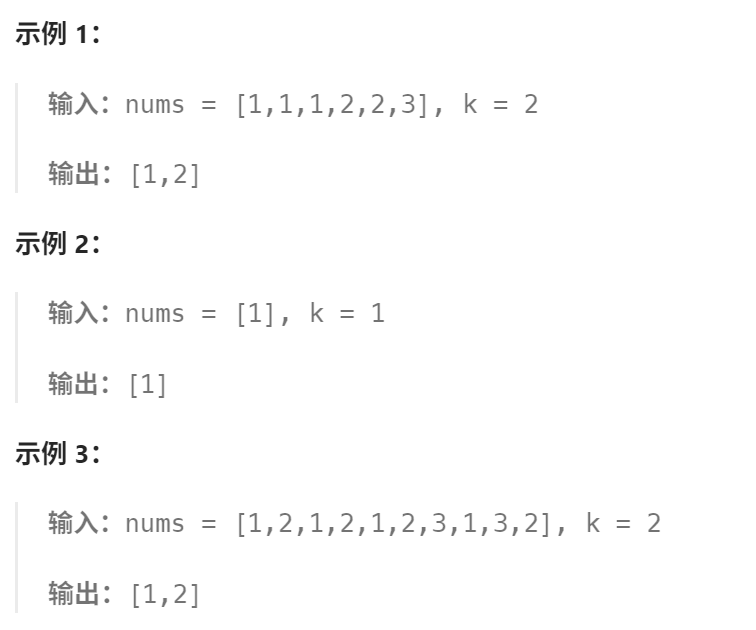

核心思路：

堆不是排序结构，而是“最值优先结构”。

它维护的是“优先级关系”，不是“顺序关系”。

以 O(log n) 的代价，维护“当前最小值在堆顶”

所以：

取最小：O(1)

插入：O(log n)

删除最小：O(log n)

In [22]:
from typing import List
import heapq

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        
        # 手动统计频率
        freq = {}
        for num in nums:
            if num in freq:
                freq[num] += 1
            else:
                freq[num] = 1
        
        # 建堆，维护大小为 k 的小根堆
        # 堆中元素为 (频率, 数字)
        heap = []
        
        for num, count in freq.items():
            heapq.heappush(heap, (count, num))
            
            # 保持堆大小不超过 k
            if len(heap) > k:
                heapq.heappop(heap)
        
        # 列表推导式，遍历 heap 中的每个元素，取出其中的 num，组成一个新的列表。
        return [num for _, num in heap]
# -----------------------------
# 测试
nums = [1,1,1,1,2,2,2,3,3,5]
k = 4
print(Solution().topKFrequent(nums, k))  # 输出 [1, 2]

[5, 3, 2, 1]


In [28]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        freq = dict()

        for i in nums:
            if i in freq:
                freq[i] += 1
            else:
                freq[i] = 1
        
        heap = []

        for value, count in freq.items():
            heapq.heappush(heap, (count, value))
            if len(heap) > k:
                heapq.heappop(heap)
        return [value for _, value in heap]

复杂度分析：

设

n = 数组长度；
m = 不同元素个数

统计频率：O(n)

堆操作：m 次 push，每次 O(log k)

总时间复杂度：

O(n + m log k)

最坏 m ≈ n：

O(n log k)

空间复杂度：

O(m)

做题核心判断：

如果 k 很小，用堆优于排序

如果 k 接近 n，直接排序更简单

## 295. 数据流的中位数

中位数是有序整数列表中的中间值。如果列表的大小是偶数，则没有中间值，中位数是两个中间值的平均值。

例如 arr = [2,3,4] 的中位数是 3 。
例如 arr = [2,3] 的中位数是 (2 + 3) / 2 = 2.5 。
实现 MedianFinder 类:

MedianFinder() 初始化 MedianFinder 对象。

void addNum(int num) 将数据流中的整数 num 添加到数据结构中。

double findMedian() 返回到目前为止所有元素的中位数。与实际答案相差 10-5 以内的答案将被接受。

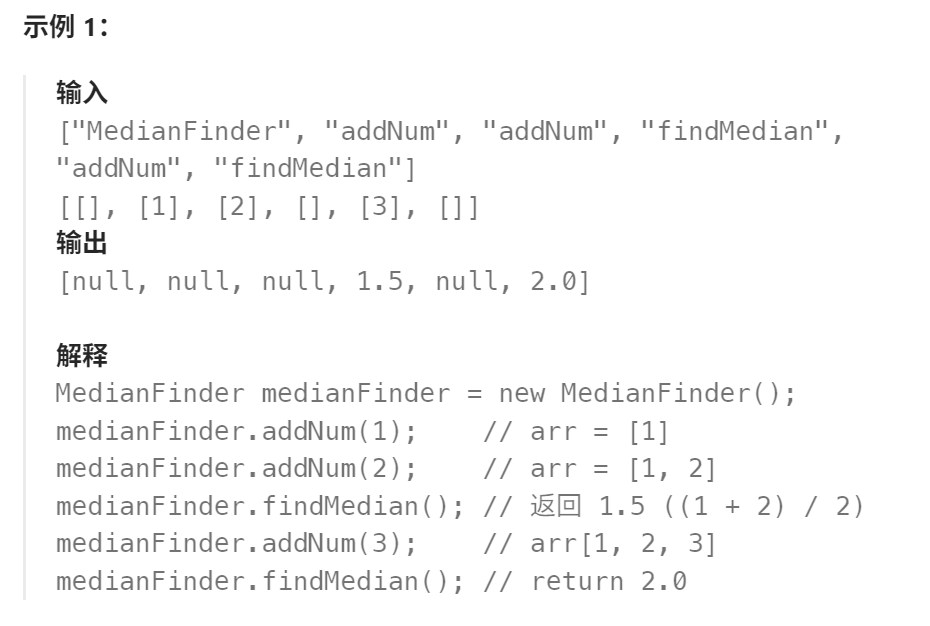

核心思路：

双堆结构（Two Heaps）

用两个堆维护左右两半数据：

左边：大根堆（存较小的一半）

右边：小根堆（存较大的一半）

保持两个不变量：

1）左堆所有元素 ≤ 右堆所有元素
2）两个堆大小差 ≤ 1

这样：

如果总数是奇数，中位数在元素多的那边

如果是偶数，中位数是两堆顶的平均值。

---

中位数 = 中间位置

我们不关心完整排序

只关心“中间边界”

双堆恰好把数据分成两半。

In [ ]:
import heapq

class MedianFinder:

    def __init__(self):
        # 左边：大根堆（存负数）
        self.small = []
        # 右边：小根堆
        self.large = []

    def addNum(self, num: int) -> None:
        """
        插入流程逻辑是：
        先进左堆
        再把左堆最大值送到右堆
        如果右堆过大，再平衡回来"""
        # 1️⃣ 先放入 small（大根堆）
        heapq.heappush(self.small, -num)

        # 2️⃣ 保证 small 最大值 <= large 最小值；
        heapq.heappush(self.large, -heapq.heappop(self.small))

        # 3️⃣ 平衡两个堆大小
        if len(self.large) > len(self.small):
            heapq.heappush(self.small, -heapq.heappop(self.large))


    def findMedian(self) -> float:

        if len(self.small) > len(self.large):
            return -self.small[0]
        else:
            return (-self.small[0] + self.large[0]) / 2
# -----------------------------
# 测试
medianFinder = MedianFinder()
medianFinder.addNum(1)
print(medianFinder.findMedian())  # 输出 1.0
medianFinder.addNum(2)
print(medianFinder.findMedian())  # 输出 1.5
medianFinder.addNum(3)
print(medianFinder.findMedian())  # 输出 2.0
medianFinder.addNum(5)
print(medianFinder.findMedian())  # 输出 2.5



1
1.5
2
2.5


In [ ]:
class MedianFinder:

    def __init__(self):
        self.small = []
        self.lager =[]

    def addNum(self, num: int) -> None:
        heapq.heappush(self.small, -num)
        heapq.heappush(self.lager, -heapq.heappop(self.small))
        if len(self.small) < len(self.lager):
            heapq.heappush(self.small, -heapq.heappop(self.lager))

    def findMedian(self) -> float:
        if len(self.small) > len(self.lager):
            return -self.small[0]
        else:
            return (-self.small[0] + self.lager[0]) / 2
        


# Your MedianFinder object will be instantiated and called as such:
# obj = MedianFinder()
# obj.addNum(num)
# param_2 = obj.findMedian()

复杂度分析分两部分：插入 n 次，与查询一次中位数。

一、单次插入 addNum 的复杂度

每次插入最多涉及：

一次 heappush

一次 heappop

可能再一次 heappush

每次堆操作时间复杂度为 O(log k)，这里 k 为当前堆大小，最大不超过 n。

因此：

单次插入 = O(log n)

加入 n 个元素：

n×O(logn)=O(nlogn)

二、单次查询 findMedian 的复杂度

查询只做：

访问堆顶

可能做一次加法和除法

不涉及堆调整。

因此：

单次查询 = O(1)

即使查询多次，每次仍为常数时间。

三、总体复杂度总结

假设：

插入 n 次

查询 m 次

总时间复杂度：

O(nlogn+m)

如果只考虑：

插入 n 个元素

查询 1 次

则总复杂度为：

O(nlogn)

四、空间复杂度

两个堆合计存储 n 个元素。

空间复杂度：

O(n)

---